<a href="https://colab.research.google.com/github/DanielTsuyoshi/Redes-Neurais/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Daniel Tsuyoshi Yamamoto

RM: 95344

Turma: 2TDSA

Ano: 2023

## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



In [11]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

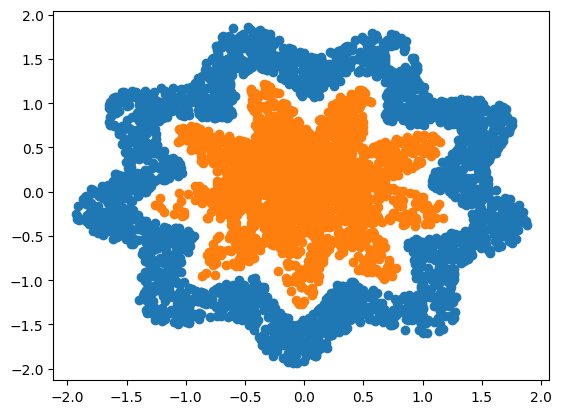

In [12]:
## coloque seu RM aqui!!
RM = [9,5,3,4,4]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

A função generate_data utiliza dois parâmetros: nData e nVertices. nData define o número de pontos que serão gerados em cada espiral, enquanto nVertices define quantas vezes a espiral dará uma volta completa antes de terminar. Esses parâmetros são importantes porque determinam a quantidade e a complexidade dos dados sintéticos que serão gerados.

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

Número de neurônios: 5


Treinamento:  [0.07274152338504791, 0.9748571515083313]
Teste:  [0.0771268904209137, 0.9739999771118164]
Número de neurônios: 10


Treinamento:  [0.07043054699897766, 0.9777143001556396]
Teste:  [0.07468190044164658, 0.9733333587646484]
Número de neurônios: 15


Treinamento:  [0.05630398914217949, 0.9777143001556396]
Teste:  [0.06209086254239082, 0.9760000109672546]
Número de neurônios: 20
Treinamento:  [0.05699046701192856, 0.9802857041358948]
Teste:  [0.06417642533779144, 0.9739999771118164]
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 20)                60        
                                                                 
 dense_75 (Dense)            (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


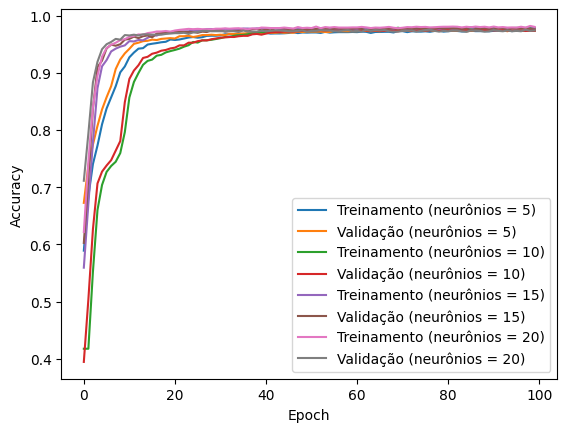

In [15]:
num_neurons = [5, 10, 15, 20]
for n in num_neurons:
    print("Número de neurônios:", n)
    model = keras.Sequential([
        keras.layers.Dense(n, input_dim=2, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    x = np.concatenate([c1, c2])
    y = np.concatenate([np.zeros(len(c1)), np.ones(len(c2))])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=0)
    print("Treinamento: ", model.evaluate(x_train, y_train, verbose=0))
    print("Teste: ", model.evaluate(x_test, y_test, verbose=0))
    plt.plot(history.history['accuracy'], label='Treinamento (neurônios = {})'.format(n))
    plt.plot(history.history['val_accuracy'], label='Validação (neurônios = {})'.format(n))
    
model.summary()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

a lista num_neurons define os diferentes números de neurônios que serão testados em uma única camada. Essa escolha vai permitir avaliar como o aumento da complexidade do modelo afeta o desempenho na classificação dos dados gerados. O número de épocas e a taxa de aprendizado escolhidos para o treinamento da rede neural (epochs=100, learning_rate=0.01) são valores razoáveis que podem funcionar bem para esse tipo de problema.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 0.6757 - accuracy: 0.6426 - val_loss: 0.6445 - val_accuracy: 0.6847
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7286 - val_loss: 0.5574 - val_accuracy: 0.7840
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.8674 - val_loss: 0.4315 - val_accuracy: 0.9327
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.9514 - val_loss: 0.2812 - val_accuracy: 0.9547
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9566 - val_loss: 0.1981 - val_accuracy: 0.9567
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9586 - val_loss: 0.1574 - val_accuracy: 0.9607
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9660 - val_loss: 0.1336 - val_accuracy: 0.9627

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 0.5903 - accuracy: 0.7123 - val_loss: 0.5048 - val_accuracy: 0.8427
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8871 - val_loss: 0.3229 - val_accuracy: 0.9300
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9469 - val_loss: 0.1821 - val_accuracy: 0.9627
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9606 - val_loss: 0.1267 - val_accuracy: 0.9667
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9651 - val_loss: 0.1010 - val_accuracy: 0.9693
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9666 - val_loss: 0.0902 - val_accuracy: 0.9687
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9689 - val_loss: 0.0803 - val_accuracy: 0.9720

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 0.6469 - accuracy: 0.7383 - val_loss: 0.5596 - val_accuracy: 0.8580
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8917 - val_loss: 0.2592 - val_accuracy: 0.9520
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9571 - val_loss: 0.1296 - val_accuracy: 0.9647
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9657 - val_loss: 0.0951 - val_accuracy: 0.9707
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9671 - val_loss: 0.0850 - val_accuracy: 0.9713
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9709 - val_loss: 0.0785 - val_accuracy: 0.9713
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9697 - val_loss: 0.0838 - val_accuracy: 0.9693

Epoch 1/100
110/110 [==============================] - 1s 3ms/step - loss: 0.5915 - accuracy: 0.6463 - val_loss: 0.4531 - val_accuracy: 0.8653
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.9211 - val_loss: 0.2066 - val_accuracy: 0.9640
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9669 - val_loss: 0.0957 - val_accuracy: 0.9693
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9711 - val_loss: 0.0823 - val_accuracy: 0.9700
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9734 - val_loss: 0.0692 - val_accuracy: 0.9747
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9751 - val_loss: 0.0676 - val_accuracy: 0.9707
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9740 - val_loss: 0.0642 - val_accuracy: 0.9740

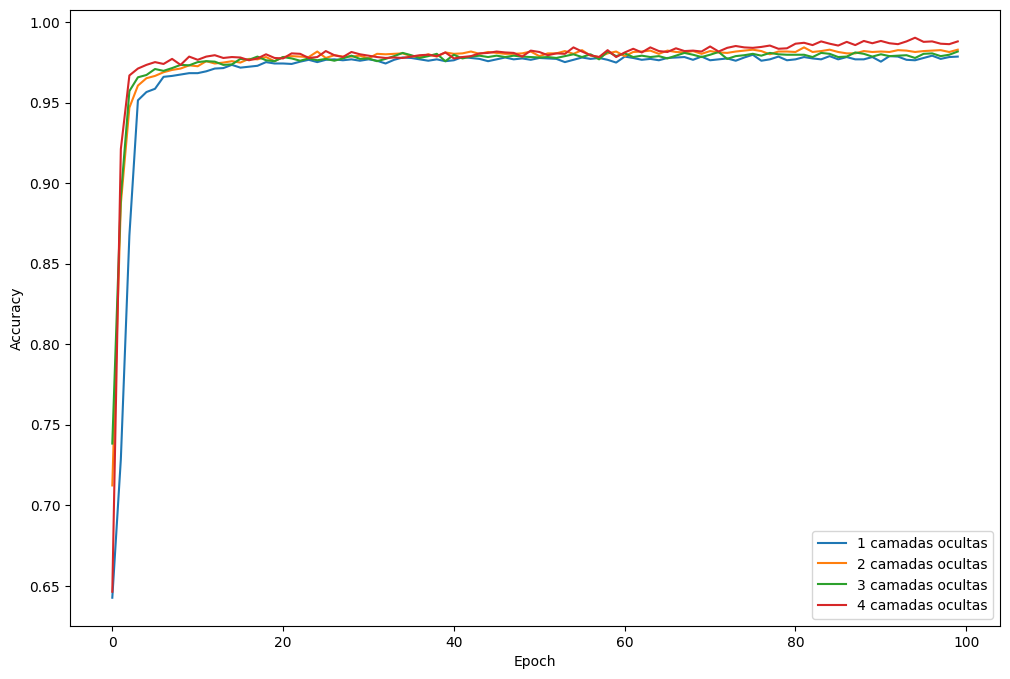

In [17]:
num_layers = [1, 2, 3, 4]
histories = []
for nl in num_layers:
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=2, activation='relu')
    ])
    for _ in range(nl):
        model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    # Dividindo em conjunto de treinamento e teste
    x = np.concatenate([c1, c2])
    y = np.concatenate([np.zeros(len(c1)), np.ones(len(c2))])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Treinando o modelo
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)
    histories.append(history)

# Plot dos resultados
plt.figure(figsize=(12,8))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'{num_layers[i]} camadas ocultas')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

a lista num_layers vai definir o número de camadas que serão testadas. A escolha de 10 neurônios em cada camada e a função de ativação ReLU são comuns para problemas de classificação. O objetivo aqui é avaliar o impacto da profundidade da rede neural na capacidade de classificação dos dados.

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras

In [19]:
def create_model(lr):
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=2, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

params = {'lr': [0.01, 0.001, 0.0001]}

grid = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=3, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-19-b98f4d7969fb>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


37/37 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6204


37/37 [==============================] - 0s 939us/step - loss: 0.7735 - accuracy: 0.2939


37/37 [==============================] - 0s 916us/step - loss: 0.7146 - accuracy: 0.4237


37/37 [==============================] - 0s 909us/step - loss: 0.7416 - accuracy: 0.4353


37/37 [==============================] - 0s 973us/step - loss: 0.6295 - accuracy: 0.6255


37/37 [==============================] - 0s 912us/step - loss: 0.6416 - accuracy: 0.5883


37/37 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.5784


37/37 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.7481


37/37 [==============================] - 0s 926us/step - loss: 0.6717 - accuracy: 0.5137


110/110 [==============================] - 1s 1ms/step - loss: 0.6167 - accuracy: 0.6229
Best: 0.613400 using {'lr': 0.0001}


a função RandomizedSearchCV vai ser usada para encontrar a melhor taxa de aprendizado para o modelo de rede neural. Esse é um processo importante porque a taxa de aprendizado é um hiperparâmetro crítico para o treinamento da rede neural.

In [20]:
activations = ['relu', 'sigmoid', 'tanh', 'softmax']
results = []

for activation in activations:
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=2, activation=activation),
        keras.layers.Dense(10, activation=activation),
        keras.layers.Dense(10, activation=activation),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=0)
    results.append((activation, history.history['val_accuracy'][-1]))

print(results)

[('relu', 0.9706666469573975), ('sigmoid', 0.9653333425521851), ('tanh', 0.9633333086967468), ('softmax', 0.9546666741371155)]


a lista activations define as diferentes funções de ativação que serão testadas em cada camada oculta, com o objetivo de avaliar como elas podem afetar o desempenho da rede neural na classificação dos dados gerados. O número de épocas e a taxa de aprendizado são novamente os mesmos valores usados anteriormente.